### EDA ON FLIGHT PRICE PREDICTION DATASET

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore' , message = 'Bhag yaha se')

In [454]:
df = pd.read_excel("C:\\Users\\hs081\\Downloads\\flight_price.xlsx")

In [455]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [456]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [457]:
df.shape

(10683, 11)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [459]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [460]:
df.duplicated().sum()

220

In [461]:
df.drop_duplicates(inplace = True)

In [462]:
df.duplicated().sum()

0

In [463]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [464]:
[features for features in df.columns if df[features].isna().sum() > 0]

['Route', 'Total_Stops']

In [465]:
#visualization of NULL values

<AxesSubplot:>

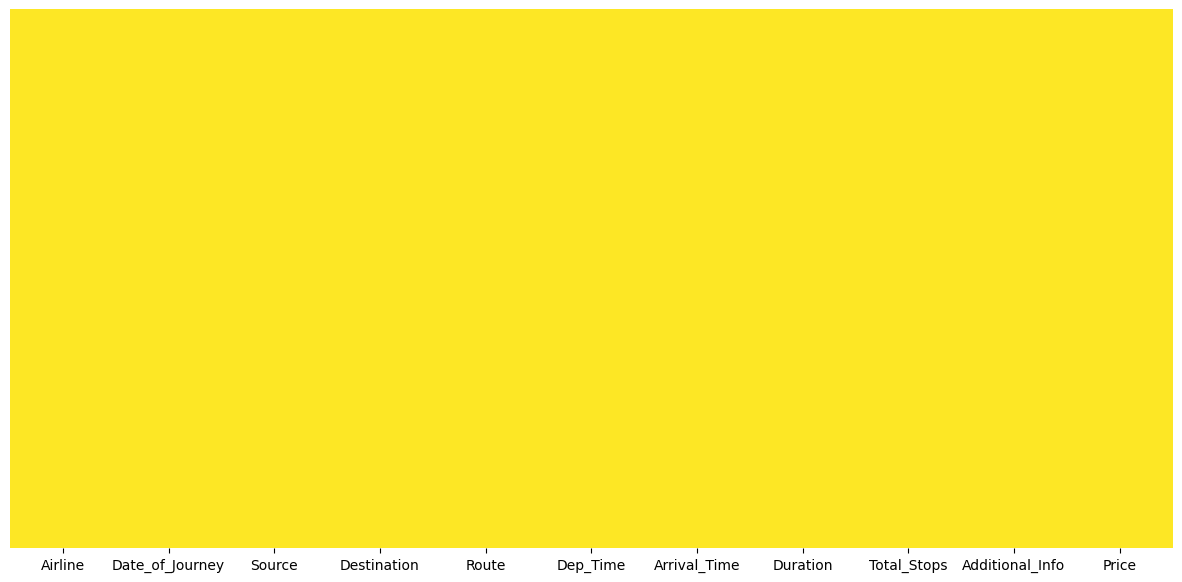

In [466]:
plt.rcParams['figure.figsize'] = (15,7)
sns.heatmap(df.isnull() , yticklabels=False , cbar = False , cmap = 'viridis_r')

In [467]:
df.dropna(inplace = True)

In [468]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [469]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [470]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [471]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [472]:
Day = df['Date_of_Journey'].str.split('/').str[0]

In [473]:
Month = df['Date_of_Journey'].str.split('/').str[1]

In [474]:
Year = df['Date_of_Journey'].str.split('/').str[2]

In [475]:
Day

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10462, dtype: object

In [476]:
Month

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Date_of_Journey, Length: 10462, dtype: object

In [477]:
Year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [478]:
df['Day'] = Day

In [479]:
df['Month'] = Month

In [480]:
df['Year'] = Year

In [481]:
df.drop('Date_of_Journey' , axis = 1 , inplace = True)

In [482]:
#Changing type of Day  , Month ,year columns

In [483]:
df[['Day' , 'Month' , 'Year']] = df[['Day' , 'Month' , 'Year']].astype(int)

In [484]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Year                int32
dtype: object

In [485]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [486]:
df['Dep_Hours'] = df['Dep_Time'].str.split(':').str[0]

In [487]:
df['Dep_Minutes'] = df['Dep_Time'].str.split(':').str[1]

In [488]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [489]:
df.drop('Dep_Time' , axis = 1 , inplace = True)

In [490]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [491]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Year                int32
Dep_Hours          object
Dep_Minutes        object
dtype: object

In [492]:
df[['Dep_Hours' , 'Dep_Minutes']] = df[['Dep_Hours' , 'Dep_Minutes']].astype(int)

In [493]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Year                int32
Dep_Hours           int32
Dep_Minutes         int32
dtype: object

In [494]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [495]:
df['Arr_Hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]

In [496]:
df['Arr_Minutes'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [497]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [498]:
df.drop('Arrival_Time' , axis = 1 , inplace = True)

In [499]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [500]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Year                int32
Dep_Hours           int32
Dep_Minutes         int32
Arr_Hours          object
Arr_Minutes        object
dtype: object

In [501]:
df[['Arr_Hours' , 'Arr_Minutes']] = df[['Arr_Hours' , 'Arr_Minutes']].astype(int)

In [502]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Year                int32
Dep_Hours           int32
Dep_Minutes         int32
Arr_Hours           int32
Arr_Minutes         int32
dtype: object

In [503]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [504]:
df['Dur_Hours'] = df['Duration'].str.split(' ').str[0].str.strip('h')

In [505]:
df['Dur_Hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [506]:
df[df['Duration'] == '5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m


In [507]:
df.drop(6474 , axis = 0 , inplace = True)

In [508]:
df.reset_index()

,index,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2
10457,10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2
10458,10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,3
10459,10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2


In [509]:
df.iloc[[6474]]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours
6554,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,6144,24,3,2019,20,0,22,55,2


In [510]:
df['Dur_Hours'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [511]:
df['Dur_Hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [512]:
df['Dur_Minutes'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0].replace(np.nan, '0')

In [513]:
df['Dur_Minutes'].unique()

array(['50', '25', '0', '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [514]:
df.drop('Route', axis = 1, inplace = True)

In [515]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours,Dur_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [516]:
df.drop('Duration', axis = 1, inplace = True)

In [517]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours,Dur_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [518]:
df[['Dur_Hours' , 'Dur_Minutes']] = df[['Dur_Hours' , 'Dur_Minutes']].astype(int)

In [519]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Year                int32
Dep_Hours           int32
Dep_Minutes         int32
Arr_Hours           int32
Arr_Minutes         int32
Dur_Hours           int32
Dur_Minutes         int32
dtype: object

In [520]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours,Dur_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [521]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [522]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop' : 0 ,'1 stop' : 1 , '2 stops' : 2 , '3 stops' : 3 , '4 stops' : 4  })

In [525]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours,Dur_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25


In [559]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [526]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [527]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [528]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [529]:
#One hot Encoding

In [578]:
from sklearn.preprocessing import OrdinalEncoder

In [581]:
encoder = OrdinalEncoder(categories = [['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet']]  )

In [588]:
encoder.fit_transform(df[['Airline']])

array([[0.],
       [1.],
       [2.],
       ...,
       [2.],
       [6.],
       [1.]])

In [589]:
df_encoder = pd.DataFrame(encoder.fit_transform(df[['Airline']]), columns = ['Airline_'])

In [590]:
df_encoder

,Airline_
0,0.0
1,1.0
2,2.0
3,0.0
4,0.0
...,...
10456,7.0
10457,1.0
10458,2.0
10459,6.0


In [591]:
df.shape

(10461, 15)

In [592]:
df_encoder.shape

(10461, 1)

In [595]:
df_final = pd.concat([df,df_encoder] , axis =1)

In [596]:
df_final

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours,Dur_Minutes,Airline_
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24.0,3.0,2019.0,22.0,20.0,1.0,10.0,2.0,50.0,0.0
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1.0,5.0,2019.0,5.0,50.0,13.0,15.0,7.0,25.0,1.0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9.0,6.0,2019.0,9.0,25.0,4.0,25.0,19.0,0.0,2.0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12.0,5.0,2019.0,18.0,5.0,23.0,30.0,5.0,25.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1.0,3.0,2019.0,16.0,50.0,21.0,35.0,4.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
10406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [598]:
df_final[df_final.isnull().any(axis = 1)]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes,Dur_Hours,Dur_Minutes,Airline_
10461,IndiGo,Kolkata,Banglore,0.0,No info,4804.0,24.0,4.0,2019.0,9.0,35.0,12.0,20.0,2.0,45.0,NaN
10462,Jet Airways,Mumbai,Hyderabad,0.0,No info,5678.0,9.0,6.0,2019.0,2.0,55.0,4.0,20.0,1.0,25.0,NaN
10463,Jet Airways,Mumbai,Hyderabad,0.0,In-flight meal not included,2470.0,24.0,3.0,2019.0,7.0,10.0,8.0,35.0,1.0,25.0,NaN
10464,Jet Airways,Banglore,New Delhi,1.0,No info,12284.0,18.0,3.0,2019.0,11.0,40.0,18.0,25.0,6.0,45.0,NaN
10465,IndiGo,Banglore,Delhi,0.0,No info,3419.0,12.0,6.0,2019.0,22.0,10.0,1.0,0.0,2.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
10406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
